# Pneumonia Detection using CNN

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data_path = r"c:\Users\nehak\Project 22- Health4u\chest_xray\chest_xray\train"
test_data_path = r"c:\Users\nehak\Project 22- Health4u\chest_xray\chest_xray\test"
validation_data_path = r"c:\Users\nehak\Project 22- Health4u\chest_xray\chest_xray\val"

NORMAL


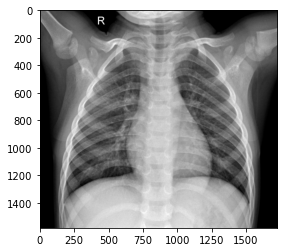

In [4]:
img_name = 'IM-0135-0001.jpeg'
img_normal = load_img(r"c:\Users\nehak\Project 22- Health4u\chest_xray\chest_xray\train\NORMAL\IM-0135-0001.jpeg")

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


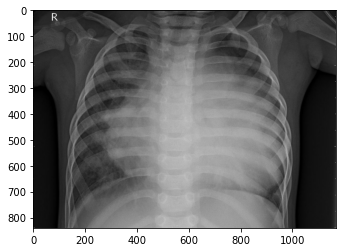

In [5]:
img_name = 'person5_bacteria_16.jpeg'
img_pneumonia = load_img(r"c:\Users\nehak\Project 22- Health4u\chest_xray\chest_xray\train\PNEUMONIA\person5_bacteria_16.jpeg")

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

In [7]:
nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [8]:
#if K.image_data_format() == 'channels_first':
#    input_shape = (3, img_width, img_height)
#else:
#    input_shape = (img_width, img_height, 3)

### Creating model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=[150, 150, 3]))#filters, kernal size and input shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
#Check information about mode
model.layers

In [12]:
model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>

In [13]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation_4')>

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [16]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [21]:
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
#from keras import backend as K
#K.tensorflow_backend._get_available_gpus()

In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\nehak\AppData\Local\Temp\ipykernel_18616\1446547674.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/20
326/326 [==============================] - 192s 586ms/step - loss: 0.4615 - accuracy: 0.7952 - val_loss: 0.7784 - val_accuracy: 0.6875
Epoch 2/20
326/326 [==============================] - 174s 535ms/step - loss: 0.2741 - accuracy: 0.8869 - val_loss: 0.7400 - val_accuracy: 0.7500
Epoch 3/20
326/326 [==============================] - 169s 518ms/step - loss: 0.2539 - accuracy: 0.9034 - val_loss: 0.3934 - val_accuracy: 0.8750
Epoch 4/20
326/326 [==============================] - 170s 522ms/step - loss: 0.2366 - accuracy: 0.9109 - val_loss: 0.4855 - val_accuracy: 0.8750
Epoch 5/20
326/326 [==============================] - 183s 560ms/step - loss: 0.2212 - accuracy: 0.9212 - val_loss: 1.3761 - val_accuracy: 0.6250
Epoch 6/20
326/326 [==============================] - 187s 572ms/step - loss: 0.2019 - accuracy: 0.9252 - val_loss: 1.4602 - val_accuracy: 0.6250
Epoch 7/20
326/326 [==============================] - 171s 524ms/step - loss: 0.2134 - accuracy: 0.9264 - val_loss: 0.9468 -

In [23]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\nehak\AppData\Local\Temp\ipykernel_18616\2998085925.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)



accuracy: 80.13%


In [24]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model\'s Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model\'s Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

### Saving Model

In [26]:
model.save('pneumonia.h5')